In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(url, index_col=0)

# Display the first few rows of the dataset
print(data.head())


      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [2]:
# Display summary statistics
print(data.describe())


               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


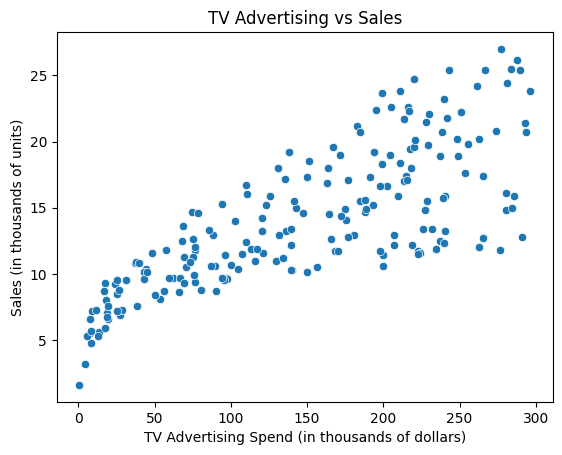

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(url, index_col=0)

# Verify the column names in your DataFrame
print(data.columns)  # Check the actual column names

# Plot TV advertising vs Sales (use the correct column name)
sns.scatterplot(x='TV', y='sales', data=data)  # 'sales' is the correct column name
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Spend (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.show()

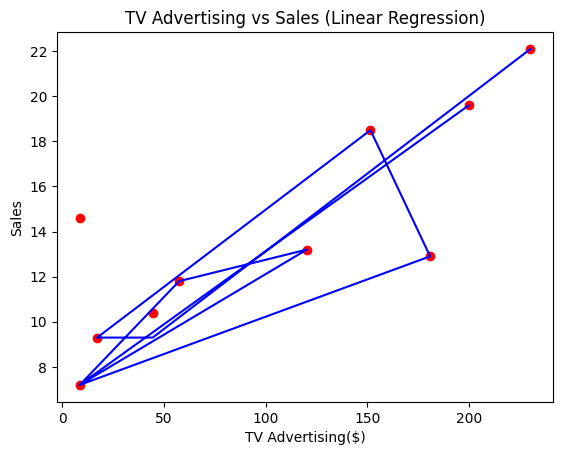

In [49]:
# Plot the regression line
plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue')
plt.title('TV Advertising vs Sales (Linear Regression)')
plt.xlabel('TV Advertising($)')
plt.ylabel('Sales')
plt.show()

In [7]:
# Extract features and target variable
X = data[['TV']]
y = data['sales']  # Change 'Sales' to 'sales'

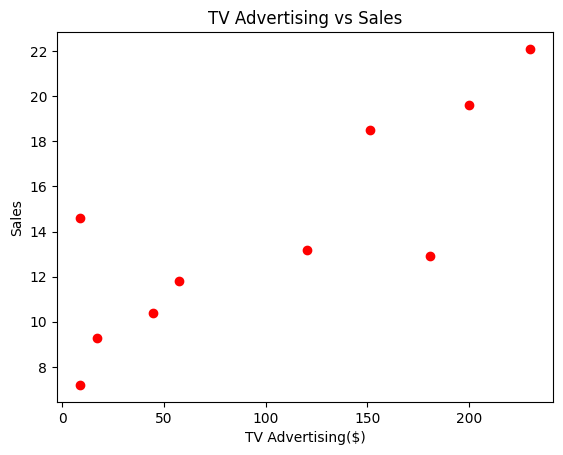

In [50]:
#Visualizing the relationship between TV Advertising and Sales
plt.scatter(data['TV'], data['Sales'], color= 'red')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising($)')
plt.ylabel('Sales')
plt.show()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

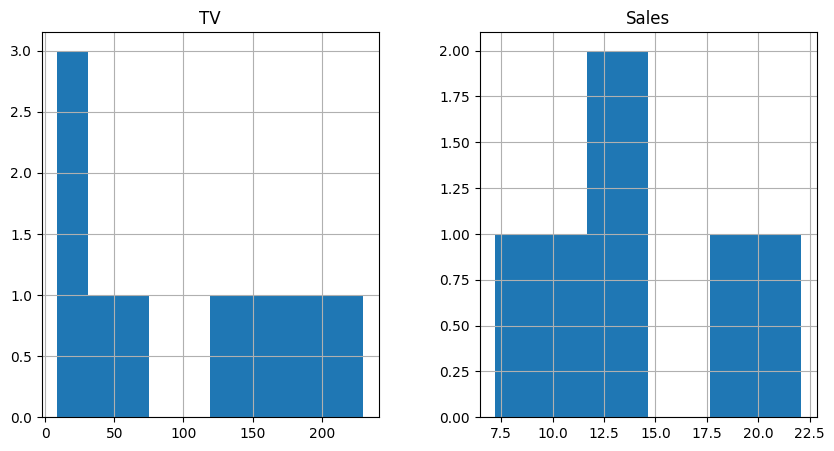

In [52]:
data.hist(figsize=(10,5))

In [9]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 10.204654118800956
R^2 Score: 0.6766954295627076


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [14]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(200, 4)

In [18]:
numerical_summary = data.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
sales,200.000000,14.022500,5.217457,1.600000,10.375000,12.900000,17.400000,27.000000


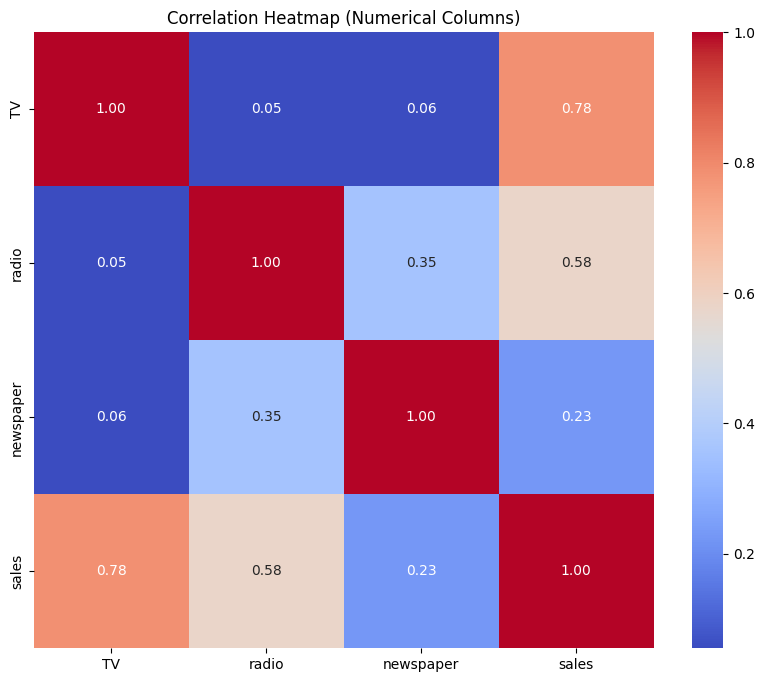

In [20]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_df = data[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

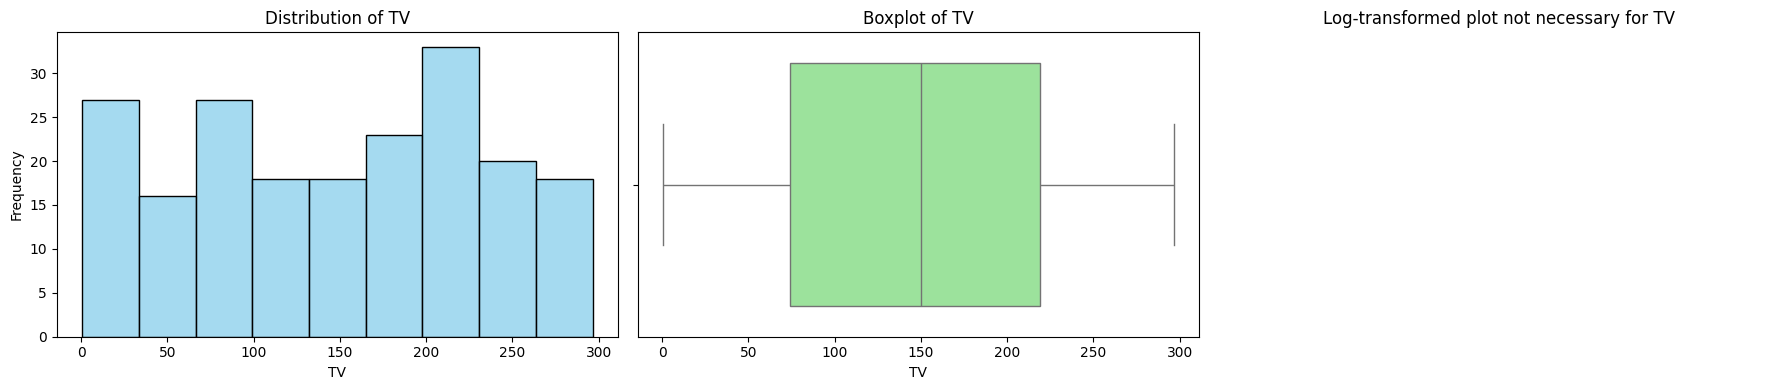

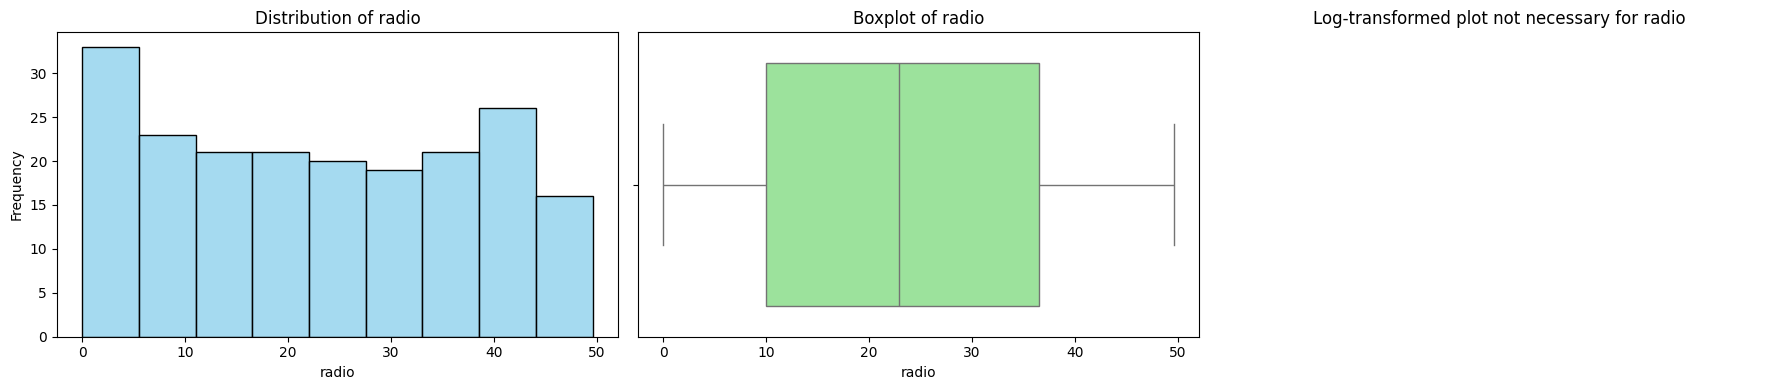

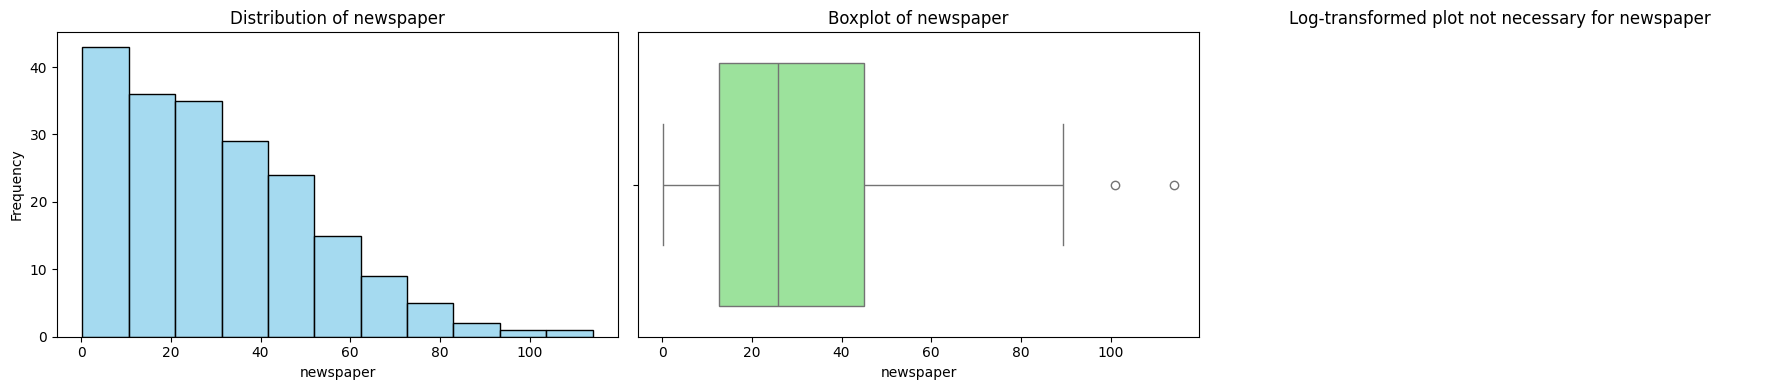

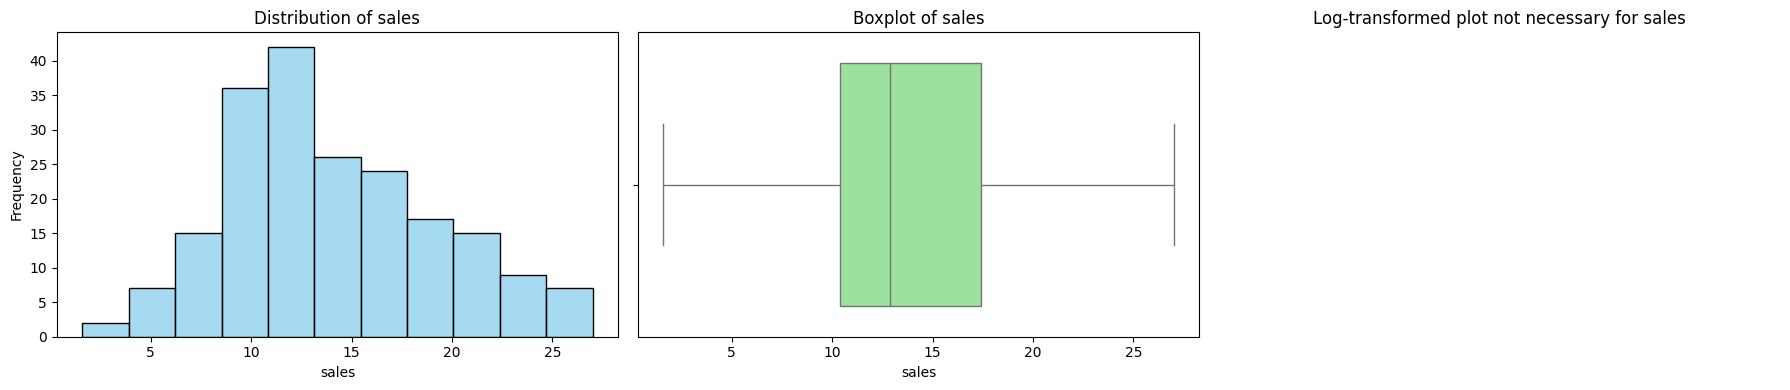

In [24]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if data[column].skew() > 1:
        df[column+'_log'] = np.log1p(data[column])
        sns.histplot(data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

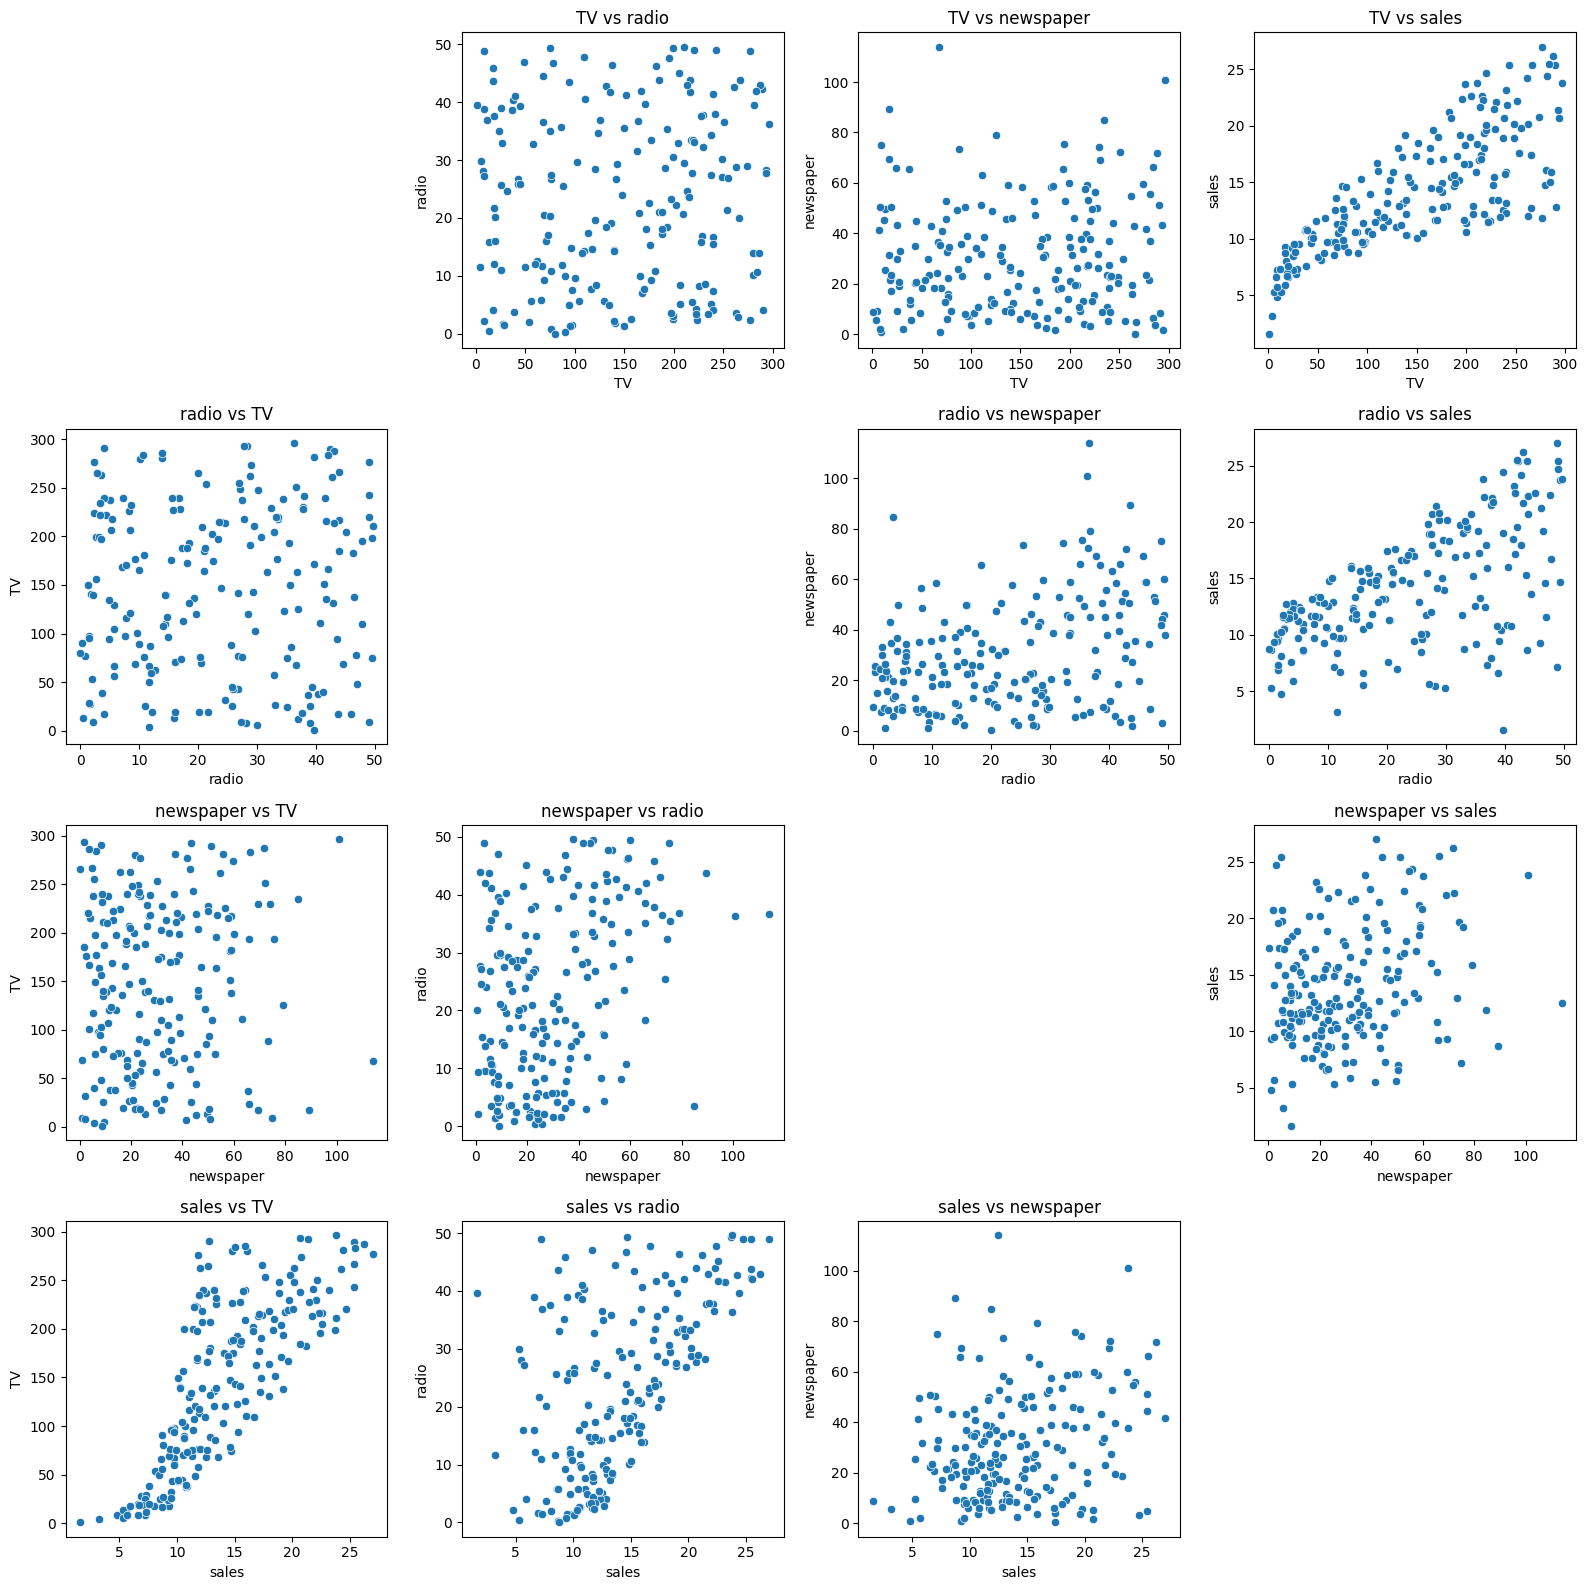

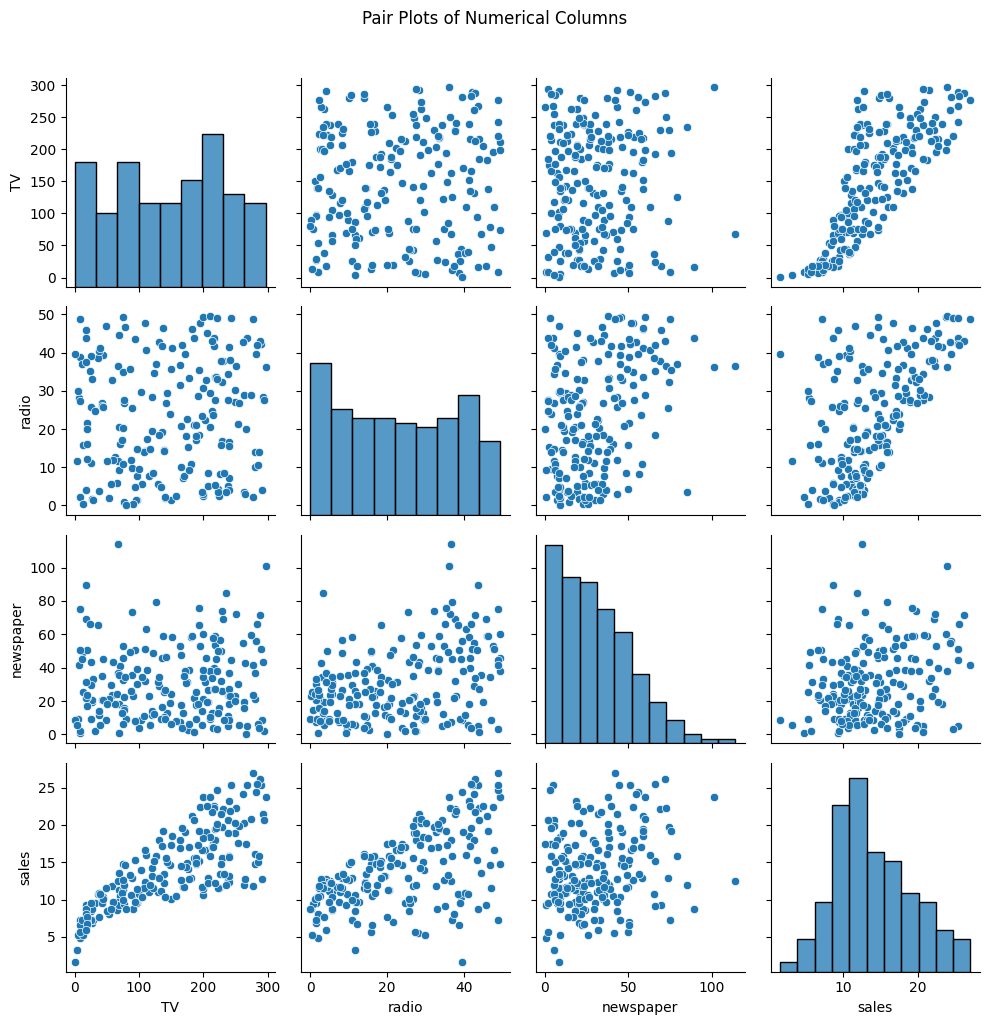

In [26]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=data[numerical_columns[i]], y=data[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(data, numerical_columns)
pair_plots(data, numerical_columns)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [29]:
data

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

In [32]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 10.603600570989268
Testing MSE: 10.204654118800956
Training R2 Score: 0.5911667812043272
Testing R2 Score: 0.6766954295627076


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=3)

In [40]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 28.359999999999996
Training R2 Score: 1.0
Testing R2 Score: -5.430839002267575


In [41]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [45]:

y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.8771426861071228
Testing MSE: 17.045827059554323
Training R2 Score: 0.9633368610002508
Testing R2 Score: -2.8652669069284196


In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,4.492070e+00,21.338893,0.812239,-3.838751
1,Decision Tree,0.000000e+00,28.360000,1.000000,-5.430839
2,Random Forest,2.027493e+00,21.430501,0.915254,-3.859524
3,XGBoost,9.620190e-07,27.977587,1.000000,-5.344124


In [57]:
import numpy as np
X= np.array(data.drop('Sales', axis=1))
y= np.array(data['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


<ipython-input-63-56bce36fff1d>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(linr['predicted'], color='g', label='Predicted Sales', ax=ax)


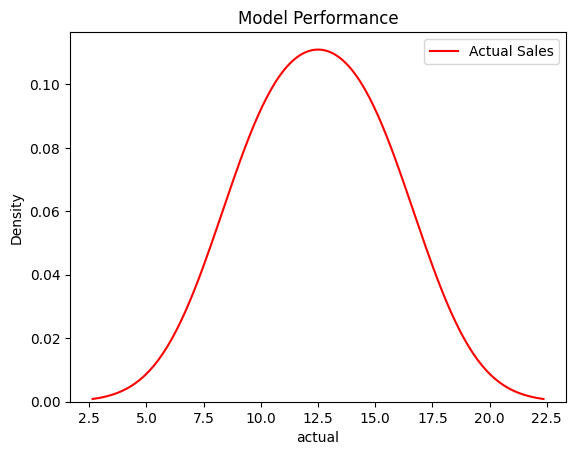

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous steps
# Create a DataFrame to store actual and predicted values
linr = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Plot the KDE plots
ax = sns.kdeplot(linr['actual'], color='r', label='Actual Sales')
sns.kdeplot(linr['predicted'], color='g', label='Predicted Sales', ax=ax)
plt.title("Model Performance")
plt.legend()
plt.show()


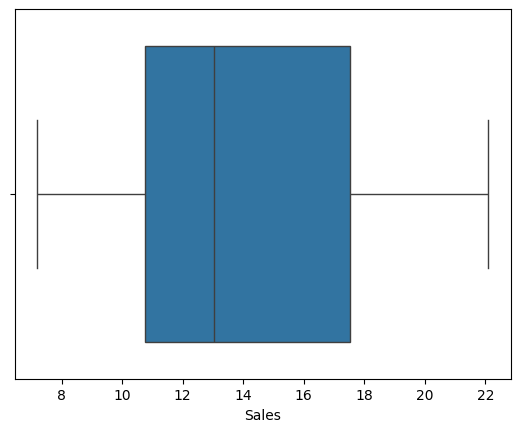

In [79]:
fig = plt.plot(figsize=(15,5))
sns.boxplot(data['Sales'], orient='h')
plt.show()

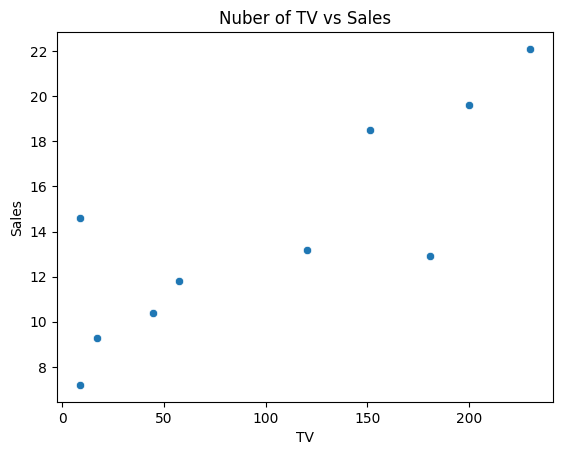

In [81]:
sns.scatterplot(data=data, x='TV', y="Sales")
plt.title("Nuber of TV vs Sales")
plt.show()


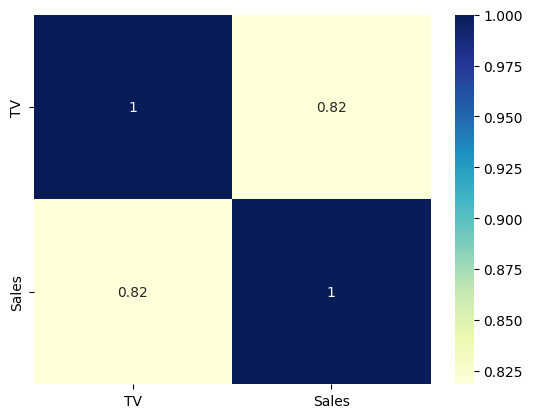

In [89]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()